# Laboratorio 2: Programación Lineal Mixta (MA4702, otoño 2023)

Fecha: 14 de Abril, 2023.<br/>
Profesor: Marcos Kiwi.<br/>
Auxiliares: Benjamín Jáuregui y Cristian Palma.<br/>

## Preliminares

Este laboratorio consta de 3 etapas. Una tarea introductoria, una etapa presencial y otra no-presencial.
La nota global del laboratorio será 30 % (TI) + 40 % (TP) + 30 % (TNP), donde (TI) es la nota de la tarea
introductoria, (TP) la nota del trabajo presencial y (TNP) la nota del trabajo no presencial.

La tarea introductoria es de carácter estrictamente individual. La etapa presencial y no-presencial son de carácter grupal. 

## Laboratorio 2: Tarea Introductoria (TI)

## Instrucciones

* La respuesta a esta tarea consiste en completar este mismo archivo `.ipnyb` y entregarlo a través de Tareas en UCursos, antes de las **14:15 del miércoles 19 de abril de 2023** (Se descontará 1.0 pts. por cada 15 minutos o fracción de atraso.)

* Realice esta primera tarea de manera **individual**. Bajo ningún motivo discuta sus respuestas, ni comparta o deje a disposición los archivos con sus compañeros. Se hará un estudio de similitudes entre los archivos resultantes para detectar posibles plagios.

<div class="alert alert-block alert-warning">
    Advertencia: Si en el archivo que entregue alguna de las celdas arroja un mensaje de error al ejecutar o el código entra en un loop infinito y no retorna con ninguna salida, Ud. deberá agregar una nota al respecto, explicando cual cree que es el problema. Si no lo hace, se le penalizará adicionalmente.               
</div>


## Datos personales

<div class="alert alert-block alert-success">
    Indique su nombre: Miguel Antonio Escobar Mendoza <br/>              
</div>


## Introducción

El objetivo de esta Tarea Introductoria es familiarizarse con un programa en `Julia`/`JuMP`/`Gurobi` para crear y manipular un árbol *Branch \& Bound (BnB)* generado al resolver un programa entero.  En la parte presencial del laboratorio se manipulará y modificará un programa similar para ilustrar y estudiar el efecto de distintas
opciones involucradas en el uso de la técnica de BnB.


Entre los archivos que obtuvo de UCursos encontrará dos cuyos nombres son `lab2TI-BnB.jl` y `lab2TI-Structs.jl`. Ambos deben quedar en su directorio de trabajo.  En el segundo de estos archivos se definen un par de tipos compuestos (llamados *struct*'s en `Julia`). En particular, se definen los siguientes tipos:
* `BBNode`: Describe un nodo de un árbol de BnB.
* `BBStatus`: Describe información relacionada a un árbol de BnB como cota superior, cota inferior, solución incumbente, etc.

Por completitud, a continuación se incluye una copia del archivo `lab2TI-Structs.jl`:

```julia
using JuMP, Gurobi

# Structure of a node in the tree (always copied). 
mutable struct BBNode
  # Tree structure. 
  parent::Union{Nothing, BBNode}
  children::Array{BBNode, 1}
  
  # Branching information. 
  variable::Int # Just an index of the variable for the branching.
                # Indexing starts at 1 (0: no branching; only for 
                # root node).
  variable_value::Int
  
  # Node's LP information. 
  lp_value::Float64
  lp_feasibility::MOI.TerminationStatusCode  # :Optimal or 
                                             # something else. 
  solution::Array{Float64, 1}
  integer_feasible::Bool
end

mutable struct BBStatus
  upper_bound::Float64 # Computed from the LPs. 
  lower_bound::Float64 # Incumbent.
  incumbent::Array{Int, 1} # Rounded from floating-point solution.   
  root::BBNode
end
```

Analice el programa `lab2TI-BnB.jl`. Vea que funciones implementa, estudie la dependencia entre las funciones (cuáles invocan a cuáles), etc.

El `.zip` que obtuvo de UCursos contiene varios archivos, cada uno de ellos describiendo una instancia del problema de la Mochila. La $i$-ésima línea de cada archivo de instancias contiene un par de números separado por una coma que representan el peso y el valor del ítem $i$, respectivamente. En los archivos de instancias, no se indica el peso total que soporta la mochila, dado que siempre se asumirá que el límite es $5$ veces el número de ítems de la instancia (número de líneas del archivo correspondiente). Debe dejar los archivos de instancias en una subcarpeta, llamada `dirTI`, de su directorio de trabajo. 

Ejecute el `lab2TI-BnB.jl` en las instancias referidas en el párrafo anterior usando el comando indicado a continuación. Analice la salida generada por el programa. Contraste la salida con el código del programa identificando qué partes del código son responsables de generar cada parte de la salida. En la parte presencial del laboratorio necesitará tener un conocimiento cabal del mismo código.


In [10]:
# using Pkg; Pkg.add("DelimitedFiles")     # Descomente si no tiene instalado el paquete "DelimitedFiles".
using DelimitedFiles

include("lab2TI-BnB.jl")

for fn in readdir("dirTI")   # Cíclo sobre la lista de archivos del subdirectorio dirTI.
  global 
  W = readdlm(joinpath("dirTI",fn), ',', Int, '\n') # Lee contenidos del archivo y los almacena en W (variable global).

  println( "out ", repeat('=', 60) );  
  println( "out Instancia ", fn );
  println( "out ", repeat('=', 60) );
  status = bnb()    # Ejecuta BnB en la instancia.
  print(status)     # Imprime información sobre la ejecución de la instancia.
end

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-22
out ============================================================
out Instancia lab2TI-i001.txt
out ============================================================
out Solved at root node.
out [

1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0]
out Objective: 1059.0
out Complete branch-and-bound status, including tree.
out Upper bound: 1059.0
out Lower bound: 1059.0
out Incumbent: [1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1]
out Tree: 
out     Root node:               1059.0  (I)  (P: Optimality)
out ============================================================
out Instancia lab2TI-i002.txt
out ============================================================
out Solved at root node.
out [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0,

 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]
out Objective: 2034.0
out Complete branch-and-bound status, including tree.
out Upper bound: 2034.0
out Lower bound: 2034.0
out Incumbent: [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
out Tree: 
out     Root node:               2034.0  (I)  (P: Optimality)
out ============================================================
out Instancia lab2TI-i003.txt
out ============================================================
out [0] Root node solved. LP value: 90.27272727272728.
Inf
out [1] Exploring one more node.
out [1] Branching on variable 3
out [1] Iteration done. Gap: Inf. Bound: [-Inf; 82.76470588235294].
out [2] Exploring one more node.
out [2] Branching on variable 1
out [2] Iteration done. Gap: Inf. Bound: [-Inf; 82.2].
out [3] Exploring one more node.
out [3] Branching on variable 4
out [3] Found a new


out [1] Iteration done. Gap: Inf. Bound: [-Inf; 901.5714285714286].
out [2] Exploring one more node.
out [2] Branching on variable 3
out [2] Iteration done. Gap: Inf. Bound: [-Inf; 900.8235294117648].
out [3] Exploring one more node.
out [3] Branching on variable 16
out [3] Iteration done. Gap: Inf. Bound: [-Inf; 900.625].
out [4] Exploring one more node.
out [4] Branching on variable 8
out [4] Iteration done. Gap: Inf. Bound: [-Inf; 899.625].
out [5] Exploring one more node.
out [5] Branching on variable 21
out [5] Iteration done. Gap: Inf. Bound: [-Inf; 899.0].
out [6] Exploring one more node.
out [6] Branching on variable 20
out [6] Found a new incumbent. Value: 874.0
out [6] Iteration done. Gap: 0.027808676307007785. Bound: [874.0; 899.0].
out [7] Exploring one more node.
out [7] Branching on variable 6
out [7] Iteration done. Gap: 0.027808676307007785. Bound: [874.0; 899.0].
out [8] Exploring one more node.
out [8] Branching on variable 5
out [8] Found a new incumbent. Value: 894

out [27] Exploring one more node.
out [27] Branching on variable 19
out [27] Iteration done. Gap: 0.0028472394156969405. Bound: [895.0; 897.5555555555555].
out [28] Exploring one more node.
out [28] Branching on variable 10
out [28] Iteration done. Gap: 0.0020987735292188553. Bound: [895.0; 896.8823529411765].
out [29] Exploring one more node.
out [29] Branching on variable 12
out [29] Iteration done. Gap: 0.0019824061454591074. Bound: [895.0; 896.7777777777778].
out [30] Exploring one more node.
out [30] Branching on variable 22
out [30] Iteration done. Gap: 0.001487541837114211. Bound: [895.0; 896.3333333333334].
out [31] Exploring one more node.
out [31] Branching on variable 4
out [31] Iteration done. Gap: -0.00012416190712686523. Bound: [895.0; 894.8888888888889].
out Complete branch-and-bound status, including tree.
out Upper bound: 894.8888888888889
out Lower bound: 895.0
out Incumbent: [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1]
out Tree: 
out   

out [13] Exploring one more node.
out [13] Branching on variable 7
out [13] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [14] Exploring one more node.
out [14] Branching on variable 19
out [14] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [15] Exploring one more node.
out [15] Branching on variable 23
out [15] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [16] Exploring one more node.
out [16] Branching on variable 47
out [16] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [17] Exploring one more node.
out [17] Branching on variable 2
out [17] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [18] Exploring one more node.
out [18] Branching on variable 14
out [18] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [19] Exploring one more node.
out [19] Branching on variable 35
out [19] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [20] Exploring one more node.
out [20] Branching on variable 48
out [20] Iteration done. Gap: I

out [33] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [34] Exploring one more node.
out [34] Branching on variable 19
out [34] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [35] Exploring one more node.
out [35] Branching on variable 23
out [35] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [36] Exploring one more node.
out [36] Branching on variable 47
out [36] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [37] Exploring one more node.
out [37] Branching on variable 2
out [37] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [38] Exploring one more node.
out [38] Branching on variable 14
out [38] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [39] Exploring one more node.
out [39] Branching on variable 35
out [39] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [40] Exploring one more node.


out [59] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [60] Exploring one more node.
out [60] Branching on variable 20
out [60] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [61] Exploring one more node.
out [61] Branching on variable 16
out [61] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [62] Exploring one more node.
out [62] Branching on variable 10
out [62] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [63] Exploring one more node.
out [63] Branching on variable 34
out [63] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [64] Exploring one more node.
out [64] Branching on variable 39
out [64] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [65] Exploring one more node.
out [65] Branching on variable 25
out [65] Iteration done. Gap: 0.0044090215363744665


out [82] Exploring one more node.
out [82] Branching on variable 27
out [82] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [83] Exploring one more node.
out [83] Branching on variable 42
out [83] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [84] Exploring one more node.
out [84] Branching on variable 33
out [84] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [85] Exploring one more node.
out [85] Branching on variable 36
out [85] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [86] Exploring one more node.
out [86] Branching on variable 38
out [86] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [87] Exploring one more node.
out [87] Branching on variable 12
out [87] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [88] Exploring one more node.
out [88] Branchin

out [102] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [103] Exploring one more node.
out [103] Branching on variable 16
out [103] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [104] Exploring one more node.
out [104] Branching on variable 10
out [104] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [105] Exploring one more node.
out [105] Branching on variable 34
out [105] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [106] Exploring one more node.
out [106] Branching on variable 39
out [106] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [107] Exploring one more node.
out [107] Branching on variable 25
out [107] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [108] Exploring one more node.
out [108] Branching on variable 41
out [108] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [109] Exp

          
out                           Variable 41   :   0   ;   1959.0          
out                             Variable 8   :   0   ;   1959.0          
out                               Variable 7   :   0   ;   1956.3333333333335       (P: Bounds)
out                                 Variable 19   :   0   ;   1956.3       (P: Bounds)
out                                   Variable 23   :   0   ;   1955.076923076923       (P: Bounds)
out                                     Variable 47   :   0   ;   1954.5       (P: Bounds)
out                                       Variable 2   :   0   ;   1954.0       (P: Bounds)
out                                         Variable 14   :   0   ;   1954.0       (P: Bounds)
out                                           Variable 35   :   0   ;   1953.6       (P: Bounds)
out                                             Variable 48   :   0   ;   1953.5       (P: Bounds)
out                                               Variable 1   :   0   ;   1953.15789

  (P: Optimality)
out             Variable 44   :   1   ;   1960.5          
out               Variable 43   :   0   ;   1947.857142857143       (P: Bounds)
out               Variable 43   :   1   ;   1960.0526315789475          
out                 Variable 5   :   0   ;   1942.5       (P: Bounds)
out                 Variable 5   :   1   ;   1959.5          
out                   Variable 11   :   0   ;   1954.2857142857142       (P: Bounds)
out                   Variable 11   :   1   ;   1958.4285714285716          
out                     Variable 26   :   0   ;   1942.7142857142858       (P: Bounds)
out                     Variable 26   :   1   ;   1957.3529411764705       (P: Bounds)
out                       Variable 27   :   0   ;   1933.4285714285713       (P: Bounds)
out                       Variable 27   :   1   ;   1956.7142857142858       (P: Bounds)
out       Variable 30   :   1   ;   1967.5625          
out         Variable 15   :   0   ;   1965.909090909091          
ou

out                                     Variable 19   :   1   ;   1910.0       (P: Bounds)
out                                   Variable 7   :   1   ;   1954.0       (P: Bounds)
out                                 Variable 8   :   1   ;   1933.0       (P: Bounds)
out                               Variable 41   :   1   ;   1937.6666666666667       (P: Bounds)
out                             Variable 25   :   1   ;   1932.3333333333333       (P: Bounds)
out                           Variable 39   :   1   ;   1933.3333333333333       (P: Bounds)
out                         Variable 34   :   1   ;   1943.0       (P: Bounds)
out                       Variable 10   :   1   ;   1945.3333333333333       (P: Bounds)
out                     Variable 16   :   1   ;   1939.0       (P: Bounds)
out                   Variable 20   :   1   ;   1942.0       (P: Bounds)
out                 Variable 31   :   1   ;   1960.0          
out                   Variable 44   :   0   ;   1938.3333333333335     

            Variable 29   :   1   ;   1957.3333333333333       (P: Bounds)
out               Variable 44   :   0   ;   1950.0       (P: Bounds)
out               Variable 44   :   1   ;   1954.125       (P: Bounds)
out           Variable 21   :   1   ;   1960.3333333333333          
out             Variable 44   :   0   ;   1952.7142857142858       (P: Bounds)
out             Variable 44   :   1   ;   1958.0          
out               Variable 43   :   0   ;   1949.5714285714287       (P: Bounds)
out               Variable 43   :   1   ;   1957.1052631578948       (P: Bounds)
out                 Variable 5   :   0   ;   1944.2857142857142       (P: Bounds)
out                 Variable 5   :   1   ;   1956.0  (I)  (P: Optimality)
out         Variable 15   :   1   ;   1965.6666666666667          
out           Variable 44   :   0   ;   1962.181818181818          
out             Variable 21   :   0   ;   1961.857142857143          
out               Variable 29   :   0   ;   1961.0     

out [2] Iteration done. Gap: Inf. Bound: [-Inf; 1156.5].
out [3] Exploring one more node.
out [3] Branching on variable 13
out [3] Iteration done. Gap: Inf. Bound: [-Inf; 1156.5].
out [4] Exploring one more node.
out [4] Branching on variable 15
out [4] Iteration done. Gap: Inf. Bound: [-Inf; 1156.5].
out [5] Exploring one more node.
out [5] Branching on variable 2
out [5] Iteration done. Gap: Inf. Bound: [-Inf; 1156.5].
out [6] Exploring one more node.
out [6] Branching on variable 11
out [6] Found a new incumbent. Value: 1152.0
out [6] Iteration done. Gap: 0.0038910505836575876. Bound: [1152.0; 1156.5].
out [7] Exploring one more node.
out [7] Branching on variable 24
out [7] Iteration done. Gap: -0.0004342162396873643. Bound: [1152.0; 1151.5].
out Complete branch-and-bound status, including tree.
out Upper bound: 1151.5
out Lower bound: 1152.0
out Incumbent: [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
out Tree: 
out     Root node:               1160.2

out [5] Exploring one more node.
out [5] Branching on variable 31
out [5] Iteration done. Gap: 0.0012447099825740602. Bound: [2006.0; 2008.5].
out [6] Exploring one more node.
out [6] Branching on variable 32
out [6] Iteration done. Gap: 0.000697419547673653. Bound: [2006.0; 2007.4].
out Complete branch-and-bound status, including tree.
out Upper bound: 2007.4
out Lower bound: 2006.0
out Incumbent: [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1]
out Tree: 
out     Root node:               2009.75          
out       Variable 35   :   0   ;   2009.25          
out         Variable 32   :   0   ;   2007.6          
out           Variable 45   :   0   ;   2007.45          
out             Variable 39   :   0   ;   2006.0  (I)  (P: Optimality)
out             Variable 39   :   1   ;   1991.875       (P: Bounds)
out           Variable 45   :   1   ;   2002.0       (P: Bounds)
out         V

## Ejercicio 1

Complete las siguientes 4 celdas de forma de implementar las siguientes 4 funciones:
* `function profundidad(node::BBNode)`: Dado un nodo `node` tipo `BBNode` retorna la profundidad del sub-árbol del árbol de BnB enraizado en `node`.
* `function vertices(node::BBNode)`: Dado un nodo tipo `BBNode` retorna la cantidad de vértices del sub-árbol
  del árbol de BnB enraizado en `node`.
* `function hojas(node::BBNode)`: Dado un nodo `node` tipo `BBNode` retorna la cantidad de hojas del sub-árbol del árbol de BnB enraizado en `node`.
* `function histograma(node::BBNode, level::Int, hist)`: Dado un nodo `node` tipo `BBNode` a una profundidad `level-1` de un árbol BnB y un arreglo `hist` de largo `level+1` (cuyos elementos están inicializados en $0$), la función modifica dicho arreglo de forma de que `hist[d]` sea el número de nodos  a profundidad `d-1` del árbol enraizado en `node` (por convención, la raíz del árbol, esta a profundidad $0$, por lo que `hist[1]` necesariamente será igual a $1$).

Por ejemplo, para el siguiente árbol: 

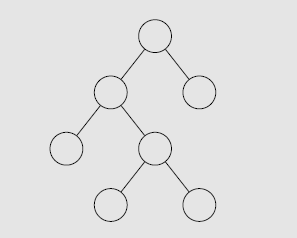

las 4 funciones indicadas retornarían
```julia
3, 7, 4, [1, 2, 2, 2]
```
respectivamente. 


In [11]:
function profundidad(node::BBNode; depth=0)
  # Dado un nodo node tipo BBNode retorna la profundidad del sub-árbol del árbol de BnB enraizado en node.
  #

  if node.children != []
    depth += 1
    return maximum([profundidad(child; depth=depth) for child in node.children])
  else
    return depth
  end

end

profundidad (generic function with 1 method)

In [12]:
function vertices(node::BBNode; counter = 1)
  # Dado un nodo tipo BBNode retorna la cantidad de vértices del sub-árbol del árbol de BnB enraizado en node.
  #
  if node.children != []
    return sum([vertices(child; counter) for child in node.children]) + 1
  else
    return 1
  end
end


vertices (generic function with 1 method)

In [13]:
function hojas(node::BBNode)
  # Dado un nodo node tipo BBNode retorna la cantidad de hojas del sub-árbol del árbol de BnB enraizado en node.
  #
  if node.children != []
    return sum([hojas(child) for child in node.children])
  else
    return 1
  end
end


hojas (generic function with 1 method)

In [17]:
function histograma!(node::BBNode, level::Int, hist::AbstractVector; current_depth=0) # cambié el nombre para ajustarse a la convención de Julia sobre funciones que mutan variables.
  # Dado un nodo node tipo BBNode a una profundidad level-1 de un árbol BnB y un arreglo hist de largo
  # level+1 (cuyos elementos están inicializados en 0), la función modifica dicho arreglo de forma
  # de que hist[d] sea el número de nodos a profundidad d-1 del árbol enraizado en node (por convención, 
  # la raíz del árbol, está a profundidad 0, por lo que hist[1] necesariamente será igual a 1).
  #
  if node.children != []
    hist[level + current_depth] += 1
    for child in node.children
      histograma!(child, level, hist; current_depth=current_depth+1)
    end
  else
    hist[level + current_depth] += 1
  end
end

histograma! (generic function with 1 method)

Finalmente, ejecute la celda de más abajo para correr su programa en los archivos de instancias arriba mencionados.

In [18]:
for fn in readdir("dirTI")
  W=readdlm(joinpath("dirTI",fn), ',', Int, '\n')

  println( "out ", repeat('=', 60) );
  println( "out Instancia ", fn );
  println( "out ", repeat('=', 60) );
  status = bnb()
  print(status)

  println("out tree ", fn)
  prof = profundidad(status.root);         # Calcula profundidad del árbol BnB
  println("out tree profund  = ", prof )   # Imprime profundidad
  println("out tree vertices = ", vertices(status.root) )    # Determina e imprime No. de nodos del árbol BnB.
  println("out tree hojas    = ", hojas(status.root) )       # Determina e imprime No. de hojas del árbol BnB.
  hist = zeros(prof+1);
  # println("out tree histogram = ", histograma!(status.root,1,hist) )     
  histograma!(status.root,1,hist)
  println("out tree histogram = ", hist) # Determina e imprime el No. de nodos por nivel del árbol BnB  (lo modifiqué pues antes 
                                         # imprimía histograma! que es una función que sólo modifica luego no retorna nada, que 
                                         # es lo pedido)                                                               
  println("out tree")
end

out ============================================================
out Instancia lab2TI-i001.txt
out ============================================================
out Solved at root node.
out [1.0, 0.0, 1.0, 0.0, 0.0

, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0]
out Objective: 1059.0
out Complete branch-and-bound status, including tree.
out Upper bound: 1059.0
out Lower bound: 1059.0
out Incumbent: [1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1]
out Tree: 
out     Root node:               1059.0  (I)  (P: Optimality)
out tree lab2TI-i001.txt
out tree profund  = 0
out tree vertices = 1
out tree hojas    = 1
out tree histogram = [1.0]
out tree
out ============================================================
out Instancia lab2TI-i002.txt
out ============================================================
out Solved at root node.
out [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 

1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]
out Objective: 2034.0
out Complete branch-and-bound status, including tree.
out Upper bound: 2034.0
out Lower bound: 2034.0
out Incumbent: [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
out Tree: 
out     Root node:               2034.0  (I)  (P: Optimality)
out tree lab2TI-i002.txt
out tree profund  = 0
out tree vertices = 1
out tree hojas    = 1
out tree histogram = [1.0]
out tree
out ============================================================
out Instancia lab2TI-i003.txt
out ============================================================
out [0] Root node solved. LP value: 90.27272727272728.
Inf
out [1] Exploring one more node.
out [1] Branching on variable 3
out [1] Iteration done. Gap: Inf. Bound: [-Inf; 82.76470588235294].
out

out [0] Root node solved. LP value: 901.7.
Inf
out [1] Exploring one more node.
out [1] Branching on variable 2
out [1] Iteration done. Gap: Inf. Bound: [-Inf; 901.5714285714286].
out [2] Exploring one more node.
out [2] Branching on variable 3
out [2] Iteration done. Gap: Inf. Bound: [-Inf; 900.8235294117648].
out [3] Exploring one more node.
out [3] Branching on variable 16
out [3] Iteration done. Gap: Inf. Bound: [-Inf; 900.625].
out [4] Exploring one more node.
out [4] Branching on variable 8
out [4] Iteration done. Gap: Inf. Bound: [-Inf; 899.625].
out [5] Exploring one more node.
out [5] Branching on variable 21
out [5] Iteration done. Gap: Inf. Bound: [-Inf; 899.0].
out [6] Exploring one more node.
out [6] Branching on variable 20
out [6] Found a new incumbent. Value: 874.0
out [6] Iteration done. Gap: 0.027808676307007785. Bound: [874.0; 899.0].
out [7] Exploring one more node.
out [7] Branching on variable 6
out [7] Iteration done. Gap: 0.027808676307007785. Bound: [874.0; 899

out [10] Iteration done. Gap: 0.0052455889365760075. Bound: [894.0; 898.7142857142857].
out [11] Exploring one more node.
out [11] Branching on variable 8
out [11] Iteration done. Gap: 0.0052455889365760075. Bound: [894.0; 898.7142857142857].
out [12] Exploring one more node.
out [12] Branching on variable 21
out [12] Iteration done. Gap: 0.0052455889365760075. Bound: [894.0; 898.7142857142857].
out [13] Exploring one more node.
out [13] Branching on variable 20
out [13] Iteration done. Gap: 0.0052455889365760075. Bound: [894.0; 898.7142857142857].
out [14] Exploring one more node.
out [14] Branching on variable 6
out [14] Iteration done. Gap: 0.0052455889365760075. Bound: [894.0; 898.7142857142857].
out [15] Exploring one more node.
out [15] Branching on variable 5
out [15] Found a new incumbent. Value: 895.0
out [15] Iteration done. Gap: 0.004132888253059873. Bound: [895.0; 898.7142857142857].
out [16] Exploring one more node.
out [16] Branching on variable 19
out [16] Iteration done


out [26] Iteration done. Gap: 0.0030235518777847964. Bound: [895.0; 897.7142857142857].
out [27] Exploring one more node.
out [27] Branching on variable 19
out [27] Iteration done. Gap: 0.0028472394156969405. Bound: [895.0; 897.5555555555555].
out [28] Exploring one more node.
out [28] Branching on variable 10
out [28] Iteration done. Gap: 0.0020987735292188553. Bound: [895.0; 896.8823529411765].
out [29] Exploring one more node.
out [29] Branching on variable 12
out [29] Iteration done. Gap: 0.0019824061454591074. Bound: [895.0; 896.7777777777778].
out [30] Exploring one more node.
out [30] Branching on variable 22
out [30] Iteration done. Gap: 0.001487541837114211. Bound: [895.0; 896.3333333333334].
out [31] Exploring one more node.
out [31] Branching on variable 4
out [31] Iteration done. Gap: -0.00012416190712686523. Bound: [895.0; 894.8888888888889].
out Complete branch-and-bound status, including tree.
out Upper bound: 894.8888888888889
out Lower bound: 895.0
out Incumbent: [1, 

              Variable 8   :   0   ;   897.8125          
out                 Variable 21   :   0   ;   897.4444444444445          
out                   Variable 20   :   0   ;   897.4285714285714          
out                     Variable 6   :   0   ;   896.5          
out                       Variable 5   :   0   ;   895.0  (I)  (P: Optimality)
out                       Variable 5   :   1   ;   878.4285714285714       (P: Bounds)
out                     Variable 6   :   1   ;   874.0714285714286       (P: Bounds)
out                   Variable 20   :   1   ;   865.5       (P: Bounds)
out                 Variable 21   :   1   ;   875.7857142857143       (P: Bounds)
out               Variable 8   :   1   ;   883.7857142857143       (P: Bounds)
out             Variable 16   :   1   ;   884.1428571428571       (P: Bounds)
out           Variable 23   :   1   ;   896.7142857142857          
out             Variable 19   :   0   ;   888.8235294117648       (P: Bounds)
out             Var


out ============================================================
out Instancia lab2TI-i005.txt
out ============================================================
out [0] Root node solved. LP value: 1968.05.
Inf
out [1] Exploring one more node.
out [1] Branching on variable 30
out [1] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [2] Exploring one more node.
out [2] Branching on variable 21
out [2] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [3] Exploring one more node.
out [3] Branching on variable 29
out [3] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [4] Exploring one more node.
out [4] Branching on variable 31
out [4] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [5] Exploring one more node.
out [5] Branching on variable 20
out [5] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [6] Exploring one more node.
out [6] Branching on variable 16
out [6] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [7] Exploring one more node.
o


out [10] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [11] Exploring one more node.
out [11] Branching on variable 41
out [11] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [12] Exploring one more node.
out [12] Branching on variable 8
out [12] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [13] Exploring one more node.
out [13] Branching on variable 7
out [13] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [14] Exploring one more node.
out [14] Branching on variable 19
out [14] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [15] Exploring one more node.
out [15] Branching on variable 23
out [15] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [16] Exploring one more node.
out [16] Branching on variable 47
out [16] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [17] Exploring one more node.
out [17] Branching on variable 2
out [17] Iteration done. Gap: Inf. Bound: [-Inf; 1967.5625].
out [18] Exploring one more node.
out 


out [23] Exploring one more node.
out [23] Branching on variable 46
out [23] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [24] Exploring one more node.
out [24] Branching on variable 46
out [24] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [25] Exploring one more node.
out [25] Branching on variable 20
out [25] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [26] Exploring one more node.
out [26] Branching on variable 16
out [26] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [27] Exploring one more node.
out [27] Branching on variable 10
out [27] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [28] Exploring one more node.
out [28] Branching on variable 34


out [28] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [29] Exploring one more node.
out [29] Branching on variable 39
out [29] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [30] Exploring one more node.
out [30] Branching on variable 25
out [30] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [31] Exploring one more node.
out [31] Branching on variable 41
out [31] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [32] Exploring one more node.
out [32] Branching on variable 8
out [32] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [33] Exploring one more node.
out [33] Branching on variable 7
out [33] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [34] Exploring one more node.
out [34] Branching on variable 19
out [34] Iteration done. Gap: 0.007401289666783139. Bound: [1953.0; 1967.5625].
out [35] Exploring one more node.


out [42] Found a new incumbent. Value: 1957.0
out [42] Iteration done. Gap: 0.005368317397795495. Bound: [1957.0; 1967.5625].
out [43] Exploring one more node.
out [43] Branching on variable 15
out [43] Iteration done. Gap: 0.005368317397795495. Bound: [1957.0; 1967.5625].
out [44] Exploring one more node.
out [44] Branching on variable 44
out [44] Iteration done. Gap: 0.005368317397795495. Bound: [1957.0; 1967.5625].
out [45] Exploring one more node.
out [45] Branching on variable 43
out [45] Iteration done. Gap: 0.005368317397795495. Bound: [1957.0; 1967.5625].
out [46] Exploring one more node.
out [46] Branching on variable 15
out [46] Iteration done. Gap: 0.005368317397795495. Bound: [1957.0; 1967.5625].
out [47] Exploring one more node.
out [47] Branching on variable 44
out [47] Iteration done. Gap: 0.005368317397795495. Bound: [1957.0; 1967.5625].
out [48] Exploring one more node.
out [48] Branching on variable 15
out [48] Iteration done. Gap: 0.005368317397795495. Bound: [1957.0


out [56] Iteration done. Gap: 0.004433139534883754. Bound: [1957.0; 1965.7142857142858].
out [57] Exploring one more node.
out [57] Branching on variable 29
out [57] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [58] Exploring one more node.
out [58] Branching on variable 46
out [58] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [59] Exploring one more node.
out [59] Branching on variable 31
out [59] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [60] Exploring one more node.
out [60] Branching on variable 20
out [60] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [61] Exploring one more node.
out [61] Branching on variable 16
out [61] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [62] Exploring one more node.
out [62] Branching on variable 10
out [62] Iteration done. Gap: 0.0044090215363744665.


out [65] Exploring one more node.
out [65] Branching on variable 25
out [65] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [66] Exploring one more node.
out [66] Branching on variable 41
out [66] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [67] Exploring one more node.
out [67] Branching on variable 8
out [67] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [68] Exploring one more node.
out [68] Branching on variable 7
out [68] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [69] Exploring one more node.
out [69] Branching on variable 19
out [69] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [70] Exploring one more node.
out [70] Branching on variable 23
out [70] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [71] Exploring one more node.
out [71] Branching 


out [72] Branching on variable 44
out [72] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [73] Exploring one more node.
out [73] Branching on variable 43
out [73] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [74] Exploring one more node.
out [74] Branching on variable 5
out [74] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [75] Exploring one more node.
out [75] Branching on variable 11
out [75] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [76] Exploring one more node.
out [76] Branching on variable 26
out [76] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [77] Exploring one more node.
out [77] Branching on variable 44
out [77] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [78] Exploring one more node.
out [78] Branching on variable 43
out [78] Iteration

out [86] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [87] Exploring one more node.
out [87] Branching on variable 12
out [87] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [88] Exploring one more node.
out [88] Branching on variable 50
out [88] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [89] Exploring one more node.
out [89] Branching on variable 37
out [89] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [90] Exploring one more node.
out [90] Branching on variable 22
out [90] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [91] Exploring one more node.
out [91] Branching on variable 13
out [91] Iteration done. Gap: 0.0044090215363744665. Bound: [1957.0; 1965.6666666666667].
out [92] Exploring one more node.
out [92] Branching on variable 32
out [92] Iteration done. Gap: 0.0044090215363744665.

out [99] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [100] Exploring one more node.
out [100] Branching on variable 29
out [100] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [101] Exploring one more node.
out [101] Branching on variable 31
out [101] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [102] Exploring one more node.
out [102] Branching on variable 20
out [102] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [103] Exploring one more node.
out [103] Branching on variable 16
out [103] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [104] Exploring one more node.
out [104] Branching on variable 10
out [104] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [105] Exploring one more node.
out [105] Branching on variable 34
out [105] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [106] Expl

out [114] Exploring one more node.
out [114] Branching on variable 2
out [114] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [115] Exploring one more node.
out [115] Branching on variable 14
out [115] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [116] Exploring one more node.
out [116] Branching on variable 35
out [116] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [117] Exploring one more node.
out [117] Branching on variable 48
out [117] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [118] Exploring one more node.
out [118] Branching on variable 1
out [118] Iteration done. Gap: 0.0024848677922905383. Bound: [1957.0; 1961.875].
out [119] Exploring one more node.
out [119] Branching on variable 9
out [119] Found a new incumbent. Value: 1958.0
out [119] Iteration done. Gap: 0.0019751513220770947. Bound: [1958.0; 1961.875].
out [120] Exploring one more node.
out [120] Branc


out                         Variable 39   :   0   ;   1959.55          
out                           Variable 25   :   0   ;   1959.4375          
out                             Variable 41   :   0   ;   1959.0          
out                               Variable 8   :   0   ;   1959.0          
out                                 Variable 7   :   0   ;   1958.111111111111          
out                                   Variable 19   :   0   ;   1958.1          
out                                     Variable 23   :   0   ;   1957.6923076923076       (P: Bounds)
out                                       Variable 47   :   0   ;   1957.5       (P: Bounds)
out                                         Variable 2   :   0   ;   1957.3333333333333       (P: Bounds)
out                                           Variable 14   :   0   ;   1957.3333333333333       (P: Bounds)
out                                             Variable 35   :   0   ;   1957.2       (P: Bounds)
out                 

Variable 25   :   0   ;   1962.3125          
out                               Variable 41   :   0   ;   1961.0          
out                                 Variable 8   :   0   ;   1961.0          
out                                   Variable 7   :   0   ;   1958.3333333333335          
out                                     Variable 19   :   0   ;   1958.3          
out                                       Variable 23   :   0   ;   1957.076923076923       (P: Bounds)
out                                         Variable 47   :   0   ;   1956.5       (P: Bounds)
out                                         Variable 47   :   1   ;   1920.6666666666667       (P: Bounds)
out                                       Variable 23   :   1   ;   1903.3333333333333       (P: Bounds)
out                                     Variable 19   :   1   ;   1910.0       (P: Bounds)
out                                   Variable 7   :   1   ;   1954.0       (P: Bounds)
out                               

                        Variable 26   :   0   ;   1935.2222222222222       (P: Bounds)
out                         Variable 26   :   1   ;   1963.5882352941176          
out                           Variable 27   :   0   ;   1923.888888888889       (P: Bounds)
out                           Variable 27   :   1   ;   1963.4285714285713          
out                             Variable 42   :   0   ;   1948.0  (I)  (P: Optimality)
out                             Variable 42   :   1   ;   1963.3529411764705          
out                               Variable 33   :   0   ;   1919.888888888889       (P: Bounds)
out                               Variable 33   :   1   ;   1963.1176470588234          
out                                 Variable 36   :   0   ;   1915.888888888889       (P: Bounds)
out                                 Variable 36   :   1   ;   1962.0          
out                                   Variable 38   :   0   ;   1913.3333333333335       (P: Bounds)
out             

          
out                                               Variable 32   :   0   ;   1923.0  (I)  (P: Optimality)
out                                               Variable 32   :   1   ;   1957.8333333333333       (P: Bounds)
out                                                 Variable 6   :   0   ;   1917.0       (P: Bounds)
out                                                 Variable 6   :   1   ;   1956.1666666666667       (P: Bounds)
out             Variable 29   :   1   ;   1957.3333333333333       (P: Bounds)
out               Variable 44   :   0   ;   1950.0

       (P: Bounds)
out               Variable 44   :   1   ;   1954.125       (P: Bounds)
out           Variable 21   :   1   ;   1960.3333333333333          
out             Variable 44   :   0   ;   1952.7142857142858       (P: Bounds)
out             Variable 44   :   1   ;   1958.0          
out               Variable 43   :   0   ;   1949.5714285714287       (P: Bounds)
out               Variable 43   :   1   ;   1957.1052631578948       (P: Bounds)
out                 Variable 5   :   0   ;   1944.2857142857142       (P: Bounds)
out                 Variable 5   :   1   ;   1956.0  (I)  (P: Optimality)
out         Variable 15   :   1   ;   1965.6666666666667          
out           Variable 44   :   0   ;   1962.181818181818          
out             Variable 21   :   0   ;   1961.857142857143          
out               Variable 29   :   0   ;   1961.0          


out                 Variable 31   :   0   ;   1960.888888888889          
out                   Variable 20   :   0   ;   1960.7222222222222          
out                     Variable 16   :   0   ;   1960.7142857142858          
out                       Variable 10   :   0   ;   1960.6666666666667          
out                         Variable 34   :   0   ;   1960.6          
out                           Variable 39   :   0   ;   1960.55          
out                             Variable 25   :   0   ;   1960.4375          
out                               Variable 41   :   0   ;   1960.0          
out                                 Variable 8   :   0   ;   1960.0          
out                                   Variable 7   :   0   ;   1959.111111111111          
out                                     Variable 19   :   0   ;   1959.1          
out                                       Variable 23   :   0   ;   1958.6923076923076          
out                                     

out             Variable 21   :   1   ;   1956.25       (P: Bounds)
out           Variable 44   :   1   ;   1961.875          
out             Variable 43   :   0   ;   1958.909090909091          
out               Variable 21   :   0   ;   1958.7142857142858          
out                 Variable 29   :   0   ;   1958.5          
out                   Variable 46   :   0   ;   1957.0       (P: Bounds)
out                   Variable 46   :   1   ;   1957.2631578947369       (P: Bounds)
out                 Variable 29   :   1   ;   1945.8947368421052       (P: Bounds)
out               Variable 21   :   1   ;   1950.1052631578948       (P: Bounds)
out             Variable 43   :   1   ;   1960.421052631579          
out               Variable 5   :   0   ;   1953.818181818182       (P: Bounds)
out               Variable 5   :   1   ;   1957.2857142857142       (P: Bounds)
out tree lab2TI-i005.txt
out tree profund  = 24
out tree vertices = 249
out tree hojas    = 125
out tree histogram =

10.0, 10.0, 10.0, 10.0, 8.0, 8.0, 8.0, 8.0, 4.0, 2.0]
out tree
out ============================================================
out Instancia lab2TI-i006.txt
out ============================================================
out [0] Root node solved. LP value: 147.6.
Inf
out [1] Exploring one more node.
out [1] Branching on variable 2
out [1] Found a new incumbent. Value: 126.0
out [1] Iteration done. Gap: 0.1328745367919535. Bound: [126.0; 145.30769230769232].
out [2] Exploring one more node.
out [2] Branching on variable 3
out [2] Iteration done. Gap: 0.1322314049586776. Bound: [126.0; 145.2].
out [3] Exploring one more node.
out [3] Branching on variable 5
out [3] Found a new incumbent. Value: 144.0
out [3] Iteration done. Gap: -0.09879518072289155. Bound: [144.0; 131.05263157894737].
out Complete branch-and-bound status, including tree.
out Upper bound: 131.05263157894737
out Lower bound: 144.0
out Incumbent: [1, 0, 0, 1, 0]
out Tree: 
out     Root node:               147.6          


out [1] Iteration done. Gap: Inf. Bound: [-Inf; 1156.5].
out [2] Exploring one more node.
out [2] Branching on variable 25
out [2] Iteration done. Gap: Inf. Bound: [-Inf; 1156.5].
out [3] Exploring one more node.
out [3] Branching on variable 13
out [3] Iteration done. Gap: Inf. Bound: [-Inf; 1156.5].
out [4] Exploring one more node.
out [4] Branching on variable 15
out [4] Iteration done. Gap: Inf. Bound: [-Inf; 1156.5].
out [5] Exploring one more node.
out [5] Branching on variable 2
out [5] Iteration done. Gap: Inf. Bound: [-Inf; 1156.5].
out [6] Exploring one more node.
out [6] Branching on variable 11
out [6] Found a new incumbent. Value: 1152.0
out [6] Iteration done. Gap: 0.0038910505836575876. Bound: [1152.0; 1156.5].
out [7] Exploring one more node.
out [7] Branching on variable 24
out [7] Iteration done. Gap: -0.0004342162396873643. Bound: [1152.0; 1151.5].
out Complete branch-and-bound status, including tree.
out Upper bound: 1151.5
out Lower bound: 1152.0
out Incumbent: [1


out           Variable 45   :   0   ;   2007.45          
out             Variable 39   :   0   ;   2006.0  (I)  (P: Optimality)
out             Variable 39   :   1   ;   1991.875       (P: Bounds)
out           Variable 45   :   1   ;   2002.0       (P: Bounds)
out         Variable 32   :   1   ;   2005.625       (P: Bounds)
out       Variable 35   :   1   ;   2009.0          
out         Variable 31   :   0   ;   2008.5          
out           Variable 32   :   0   ;   2007.4          
out           Variable 32   :   1   ;   2002.375       (P: Bounds)
out         Variable 31   :   1   ;   2007.3125          
out tree lab2TI-i008.txt
out tree profund  = 4
out tree vertices = 13
out tree hojas    = 7
out tree histogram = [1.0, 2.0, 4.0, 4.0, 2.0]
out tree
